By:Robert MacKay

2018-MAY-1

This project utilizes data provided by the City of Calgary's Open Data system per the terms of the Open Government Licence – City of Calgary. See https://data.calgary.ca/

Project is non-commercial, with my goal to learn about fundamentals of data science and discern interesting information. 


In [106]:
from datascience import *
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plots
from datetime import *
plots.style.use('fivethirtyeight')

In [9]:
raw_data = Table.read_table("Air_Quality_Data_2010-2018.csv")
raw_data

Station Name,Date,Method,Parameter,Average Daily Value,Units,Count,Location
Calgary Central 2,2011/06/09,Teom @ 30C with FDMS (self referencing),PM2.5 Mass,22.075,ug/m3,1,"(51.046944, -114.074722)"
Calgary Central 2,2011/04/17,Instrumental,Non-methane Hydrocarbons,0.0042,ppm,1,"(51.046944, -114.074722)"
Calgary Central 2,2011/04/23,Teom @ 40C,PM10 Mass,15.5625,ug/m3,1,"(51.046944, -114.074722)"
Calgary Northwest,2011/04/02,Instrumental,Total Oxides Of Nitrogen,0.0077,ppm,1,"(51.079167, -114.141944)"
Calgary Northwest,2011/06/10,Instrumental,Relative Humidity,55.8125,percent,1,"(51.079167, -114.141944)"
Calgary Northwest,2011/07/13,Instrumental,Non-methane Hydrocarbons,0,ppm,1,"(51.079167, -114.141944)"
Calgary Central 2,2011/05/07,Instrumental,Methane,1.8121,ppm,1,"(51.046944, -114.074722)"
Calgary Central 2,2011/05/20,Instrumental,Total Oxides Of Nitrogen,0.0158,ppm,1,"(51.046944, -114.074722)"
Calgary Northwest,2011/04/26,Instrumental,Methane,1.8025,ppm,1,"(51.079167, -114.141944)"
Calgary Northwest,2011/07/05,Instrumental,Outdoor Air Temperature,18.9458,deg c,1,"(51.079167, -114.141944)"


In [43]:
stations = raw_data.select('Station Name','Location').sort('Station Name',distinct=True)
'''stations.column('Location')
location_stations = stations.with_columns(
    'Lat',
    'Long',
)'''
def fixString(lat_long):
    lat_long = lat_long.strip('(').strip(')')
    latlong = lat_long.split(',')
    return latlong

def make_float(x):
    return float(x)

vfunc = np.vectorize(make_float) #Allows a function to be assigned to an array.
location_val = vfunc(stations.apply(fixString,'Location'))
location_val

array([[  51.046944, -114.074722],
       [  51.047611, -114.075167],
       [  51.009444, -114.025278],
       [  51.079167, -114.141944],
       [  50.955122, -113.969742]])

In [46]:
stations_location = stations.with_column(
    'Lat', location_val[:,0],
    'Long', location_val[:,1]
)
stations_location

Station Name,Location,Lat,Long
Calgary Central 2,"(51.046944, -114.074722)",51.0469,-114.075
Calgary Central-Inglewood,"(51.047611, -114.075167)",51.0476,-114.075
Calgary East,"(51.009444, -114.025278)",51.0094,-114.025
Calgary Northwest,"(51.079167, -114.141944)",51.0792,-114.142
Calgary Southeast,"(50.955122, -113.969742)",50.9551,-113.97


In [90]:
#Location of air quality stations
Marker.map_table(stations_location.select('Lat','Long','Station Name'),width = 800)

In [64]:
air_quality = raw_data.where('Parameter','Air Quality Index')
air_quality

Station Name,Date,Method,Parameter,Average Daily Value,Units,Count,Location
Calgary Central 2,2011/06/28,Calculated,Air Quality Index,17.4725,nan,1,"(51.046944, -114.074722)"
Calgary Northwest,2011/08/07,Calculated,Air Quality Index,2.486,nan,1,"(51.079167, -114.141944)"
Calgary Central 2,2011/07/08,Calculated,Air Quality Index,21.4646,nan,1,"(51.046944, -114.074722)"
Calgary Central 2,2011/08/15,Calculated,Air Quality Index,11.5735,nan,1,"(51.046944, -114.074722)"
Calgary Central 2,2011/06/22,Calculated,Air Quality Index,19.7871,nan,1,"(51.046944, -114.074722)"
Calgary Northwest,2011/04/17,Calculated,Air Quality Index,15.9019,nan,1,"(51.079167, -114.141944)"
Calgary Central 2,2011/06/14,Calculated,Air Quality Index,16.025,nan,1,"(51.046944, -114.074722)"
Calgary Central 2,2011/05/16,Calculated,Air Quality Index,17.4597,nan,1,"(51.046944, -114.074722)"
Calgary Northwest,2011/07/19,Calculated,Air Quality Index,17.2146,nan,1,"(51.079167, -114.141944)"
Calgary Northwest,2011/06/17,Calculated,Air Quality Index,16.4438,nan,1,"(51.079167, -114.141944)"


In [65]:
air_quality_filtered = air_quality.select('Station Name', 'Date','Average Daily Value')
air_quality_filtered

Station Name,Date,Average Daily Value
Calgary Central 2,2011/06/28,17.4725
Calgary Northwest,2011/08/07,2.486
Calgary Central 2,2011/07/08,21.4646
Calgary Central 2,2011/08/15,11.5735
Calgary Central 2,2011/06/22,19.7871
Calgary Northwest,2011/04/17,15.9019
Calgary Central 2,2011/06/14,16.025
Calgary Central 2,2011/05/16,17.4597
Calgary Northwest,2011/07/19,17.2146
Calgary Northwest,2011/06/17,16.4438


In [108]:
air_quality_ordered = air_quality_filtered.sort('Average Daily Value', descending = True)
air_quality_ordered

Station Name,Date,Average Daily Value
Calgary Central 2,2010/08/20,82.9583
Calgary East,2010/08/20,78.9667
Calgary Northwest,2010/08/20,72.3042
Calgary Central 2,2010/08/21,41.3333
Calgary Central 2,2010/08/19,39.3018
Calgary East,2010/08/21,38.8042
Calgary East,2010/08/19,35.7935
Calgary Northwest,2010/08/21,34.9146
Calgary Central 2,2010/02/03,33.4333
Calgary East,2010/02/03,33.2875


In [89]:
plottable = air_quality_filtered.drop('Date').group('Station Name', max)
plottable

Station Name,Average Daily Value max
Calgary Central 2,82.9583
Calgary Central-Inglewood,7.9054
Calgary East,78.9667
Calgary Northwest,72.3042
Calgary Southeast,7.8094


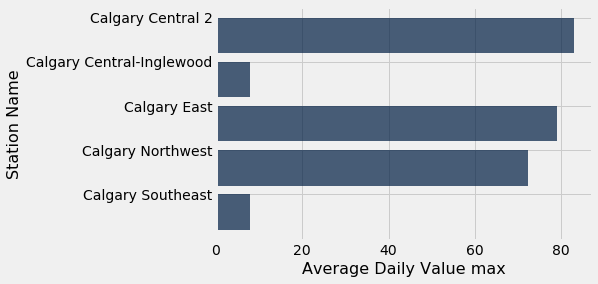

In [85]:
plottable.barh('Station Name')